# if there is more than one sparksubmit kill them using "kill pid"

In [3]:
sc

In [ ]:
filepath="file:///home/icpl12900/Desktop/assignments/routes.csv"

In [ ]:
filepath

In [ ]:
route=sc.textFile(filepath)

In [ ]:
route

In [ ]:
route.take(10)

take top 10 rows from RDD

In [ ]:
route.count()

take count of no of rows

In [ ]:
route.first()

take first row from RDD

In [ ]:

#route.collect()

take all rows from RDD

all this upper operation request data from RDD and all are called ACTION

Method which is use to read file as textFile is call "TRANSFORMATION"

Operations that create RDD and Convert one RDD into another RDD call "TRANSFORMATION"

** Difference between transformations and RDD is:
1. Transformation is not execute immediately. they execute only actions are call on them

** textFile only take file from path and create RDD for it. It not read or do any operation on it. this job is done by actions

# Filter

In [ ]:
file_for_filter="file:///home/icpl12900/Desktop/data_files/prat.csv"

In [ ]:
data_for_filter=sc.textFile(file_for_filter)

In [ ]:
data_for_filter.collect()

In [ ]:
dataofhead=data_for_filter.first()

In [ ]:
data_without_head=data_for_filter.filter(lambda x : x <> dataofhead)

In [ ]:
data_without_head.collect()

# MAP

using map we can convert unstructre string into structure string with name of filds with we can access

In [ ]:
list_string=data_without_head.map(lambda x:x.split(","))

it take whole record and split it into individual string i.e list of string

In [ ]:
list_string.collect()

In [ ]:
list_string.take(10)

*** Write function

In [ ]:
import csv
from StringIO import StringIO
from collections import namedtuple

In [ ]:
fields=dataofhead.replace(" ","_").replace("/","_").split(",")

In [ ]:
fields

to print list use only name of list i.e fields

In [ ]:
class_for_nametuple=namedtuple('class_for_nametuple',fields,verbose=True)

any object of class have fields

In [ ]:
def parse(row):
    reader = csv.reader(StringIO(row))
    row=reader.next()
    return class_for_nametuple(*row) #this function return object of class_for_name

In [ ]:
data=data_without_head.map(parse) #nametuple is created

In [ ]:
data.first() 

In [ ]:
data.first().id #access filed using name

# Find out missing value and remove it

In [ ]:
filepath="file:///home/icpl12900/Desktop/assignments/routes.csv"

In [ ]:
route=sc.textFile(filepath)

In [ ]:
header = route.first()

In [ ]:
header

In [ ]:
data_missing = route.filter(lambda x : x <> header)

In [ ]:
data_missing.take(10)

In [ ]:
import csv
from StringIO import StringIO
from collections import namedtuple

In [ ]:
header_fields = header.replace(" ","_").replace("/","_").split(",")

In [ ]:
header_fields

In [ ]:
class_for_nametuple=namedtuple('class_for_nametuple',header_fields,verbose=True)

In [ ]:
def parse(row):
    reader = csv.reader(StringIO(row))
    row=reader.next()
    return class_for_nametuple(*row)

In [ ]:
data_name=data_missing.map(parse) #nametuple is created

In [ ]:
data_name.take(10)

In [ ]:
data_name.map(lambda x : x.Codeshare).countByValue()  #contain null value

In [ ]:
data_name.map(lambda x : x.Equipment).countByValue() #''

In [ ]:
data_filter = data_name.filter(lambda x : not (x.Codeshare == '' or x.Equipment == '')) #take all data from data_name and apply function only on codeshare

In [ ]:
data_filter.map(lambda x : x.Codeshare).countByValue()

In [ ]:
a=data_filter.map(lambda x : x.Source_airport_ID)

In [ ]:
a.take(10)

In [ ]:
a.reduce(lambda x :

In [ ]:
data_filter.map(lambda x : x.Airline).countByValue()

# Reduce

In [2]:
filepath="file:///home/icpl12900/Desktop/assignments/air.csv"

In [3]:
airpot=sc.textFile(filepath)

In [4]:
airpot_header = airpot.first()

In [5]:
airpot_header

u'IATA/FAA,ICAO,Location,Altitude,Timezone,DST,Tz'

In [6]:
airpot_data = airpot.filter(lambda x :x <> airpot_header)

In [7]:
airpot_data.take(10)

[u'GKA,AYGA,"-6.081689,145.391881",5282,10,U,Pacific/Port_Moresby',
 u'MAG,AYMD,"-5.207083,145.7887",20,10,U,Pacific/Port_Moresby',
 u'HGU,AYMH,"-5.826789,144.295861",5388,10,U,Pacific/Port_Moresby',
 u'LAE,AYNZ,"-6.569828,146.726242",239,10,U,Pacific/Port_Moresby',
 u'POM,AYPY,"-9.443383,147.22005",146,10,U,Pacific/Port_Moresby',
 u'WWK,AYWK,"-3.583828,143.669186",19,10,U,Pacific/Port_Moresby',
 u'UAK,BGBW,"61.160517,-45.425978",112,-3,E,America/Godthab',
 u'GOH,BGGH,"64.190922,-51.678064",283,-3,E,America/Godthab',
 u'SFJ,BGSF,"67.016969,-50.689325",165,-3,E,America/Godthab',
 u'THU,BGTL,"76.531203,-68.703161",251,-4,E,America/Thule']

In [8]:
import csv
from StringIO import StringIO
from collections import namedtuple

In [9]:
airpot_header_fields = airpot_header.replace(" ","_").replace("/","_").split(",")

In [10]:
airpot_header_fields

[u'IATA_FAA', u'ICAO', u'Location', u'Altitude', u'Timezone', u'DST', u'Tz']

In [11]:
class_for_nametuple=namedtuple('class_for_nametuple',airpot_header_fields,verbose=True) #verbose=True it use for give more output related to class u create in spark

class class_for_nametuple(tuple):
    'class_for_nametuple(IATA_FAA, ICAO, Location, Altitude, Timezone, DST, Tz)'

    __slots__ = ()

    _fields = ('IATA_FAA', 'ICAO', 'Location', 'Altitude', 'Timezone', 'DST', 'Tz')

    def __new__(_cls, IATA_FAA, ICAO, Location, Altitude, Timezone, DST, Tz):
        'Create new instance of class_for_nametuple(IATA_FAA, ICAO, Location, Altitude, Timezone, DST, Tz)'
        return _tuple.__new__(_cls, (IATA_FAA, ICAO, Location, Altitude, Timezone, DST, Tz))

    @classmethod
    def _make(cls, iterable, new=tuple.__new__, len=len):
        'Make a new class_for_nametuple object from a sequence or iterable'
        result = new(cls, iterable)
        if len(result) != 7:
            raise TypeError('Expected 7 arguments, got %d' % len(result))
        return result

    def __repr__(self):
        'Return a nicely formatted representation string'
        return 'class_for_nametuple(IATA_FAA=%r, ICAO=%r, Location=%r, Altitude=%r, Timezone=%r, DST=%r,

In [12]:
import logging
logging.basicConfig(filename='/home/icpl12900/Desktop/example1.log',level=logging.DEBUG)
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')

In [ ]:
!pwd

In [ ]:
def parse(row):
    try:
        reader = csv.reader(StringIO(row))
        row=reader.next()
        print("{} {}".format("My Data",row.get(1)))
        return class_for_nametuple(*row)
    except:
        return class_for_nametuple(Airport_ID='24', Name='St Anthony', City='St. Anthony', Country='Canada', IATA_FAA='YAY', ICAO='CYAY', Location="51.391944,-56.083056", Altitude='108', Timezone='-3.5', DST='A', Tz='America/St_Johns')

In [16]:
def parse(row):
    reader = csv.reader(StringIO(row))
    row=reader.next()
    return class_for_nametuple(*row)

In [17]:
airpot_data_name=airpot_data.map(parse)

In [ ]:
def processRecord(record):
        print(record)

In [18]:
airpot_data.foreach(parse)

In [19]:
airpot_data_name

PythonRDD[6] at RDD at PythonRDD.scala:49

In [20]:
airpot_data_name.map(lambda x: x.Location).collect()

['-6.081689,145.391881',
 '-5.207083,145.7887',
 '-5.826789,144.295861',
 '-6.569828,146.726242',
 '-9.443383,147.22005',
 '-3.583828,143.669186',
 '61.160517,-45.425978',
 '64.190922,-51.678064',
 '67.016969,-50.689325',
 '76.531203,-68.703161',
 '65.659994,-18.072703',
 '65.283333,-14.401389',
 '64.295556,-15.227222',
 '65.952328,-17.425978',
 '66.058056,-23.135278',
 '63.985,-22.605556',
 '65.555833,-23.965',
 '64.13,-21.940556',
 '66.133333,-18.916667']

In [21]:
def extractCoords(location):
    loc_lat = float(location[1:location.index(",")])
    loc_lan = float(location[location.index(",")+1:-1])
    return(loc_lat,loc_lan)
    
    

In [22]:
airpot_data_name.map(lambda x:extractCoords(x.Location))

PythonRDD[8] at RDD at PythonRDD.scala:49

In [70]:
airpot_data_name.map(lambda x:extractCoords(x.Location))

PythonRDD[33] at RDD at PythonRDD.scala:49

In [75]:
airpot_data_name.collect()

[class_for_nametuple(IATA_FAA='GKA', ICAO='AYGA', Location='-6.081689,145.391881', Altitude='5282', Timezone='10', DST='U', Tz='Pacific/Port_Moresby'),
 class_for_nametuple(IATA_FAA='MAG', ICAO='AYMD', Location='-5.207083,145.7887', Altitude='20', Timezone='10', DST='U', Tz='Pacific/Port_Moresby'),
 class_for_nametuple(IATA_FAA='HGU', ICAO='AYMH', Location='-5.826789,144.295861', Altitude='5388', Timezone='10', DST='U', Tz='Pacific/Port_Moresby'),
 class_for_nametuple(IATA_FAA='LAE', ICAO='AYNZ', Location='-6.569828,146.726242', Altitude='239', Timezone='10', DST='U', Tz='Pacific/Port_Moresby'),
 class_for_nametuple(IATA_FAA='POM', ICAO='AYPY', Location='-9.443383,147.22005', Altitude='146', Timezone='10', DST='U', Tz='Pacific/Port_Moresby'),
 class_for_nametuple(IATA_FAA='WWK', ICAO='AYWK', Location='-3.583828,143.669186', Altitude='19', Timezone='10', DST='U', Tz='Pacific/Port_Moresby'),
 class_for_nametuple(IATA_FAA='UAK', ICAO='BGBW', Location='61.160517,-45.425978', Altitude='112'

In [72]:
airpot_data_name.map(lambda x:extractCoords(x.Location)).reduce(lambda x,y:(min(x[0],y[0]),(min(x[1],y[1]))))

#x,y means two rows
#it find long and minimum latitude
#lambda x, y means two arguuments pass to function
           

(1.160517, -68.70316)

[(6.081689, 145.39188),
 (5.207083, 145.788),
 (5.826789, 144.29586),
 (6.569828, 146.72624),
 (9.443383, 147.22),
 (3.583828, 143.66918),
 (1.160517, -45.42597),
 (4.190922, -51.67806),
 (7.016969, -50.68932),
 (6.531203, -68.70316),
 (5.659994, -18.0727),
 (5.283333, -14.40138),
 (4.295556, -15.22722),
 (5.952328, -17.42597),
 (6.058056, -23.13527),
 (3.985, -22.60555),
 (5.555833, -23.96),
 (4.13, -21.94055),
 (6.133333, -18.91666)]

In [82]:
airpot_data_name.filter(lambda x:x.DST == 'N').map(lambda x:x.Tz).countByValue()

defaultdict(int, {'Atlantic/Reykjavik': 9})

In [95]:
#need to work on it

import gmplot

gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)


# PAIR RDD

In [104]:
file1="file:///home/icpl12900/Desktop/Pair_rdd/Dodgers.data"
file2="file:///home/icpl12900/Desktop/Pair_rdd/Dodgers.events"

In [105]:
traffic=sc.textFile(file1)
traffic.take(10) #time after 5 min , no of car within that 5 min

[u'4/10/2005 0:00,-1',
 u'4/10/2005 0:05,-1',
 u'4/10/2005 0:10,-1',
 u'4/10/2005 0:15,-1',
 u'4/10/2005 0:20,-1',
 u'4/10/2005 0:25,-1',
 u'4/10/2005 0:30,-1',
 u'4/10/2005 0:35,-1',
 u'4/10/2005 0:40,-1',
 u'4/10/2005 0:45,-1']

In [107]:
game=sc.textFile(file2)
game.take(10)  #startTime , endTime, audience,opponent,win/loss along with score

[u'04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8\ufffd',
 u'04/13/05,19:10:00,21:48:00,46514,San Francisco,W 4-1\ufffd',
 u'04/15/05,19:40:00,21:48:00,51816,San Diego,W 4-0\ufffd',
 u'04/16/05,19:10:00,21:52:00,54704,San Diego,W 8-3\ufffd',
 u'04/17/05,13:10:00,15:31:00,53402,San Diego,W 6-0\ufffd',
 u'04/25/05,19:10:00,21:33:00,36876,Arizona,L 4-2\ufffd',
 u'04/26/05,19:10:00,22:00:00,44486,Arizona,L 3-2\ufffd',
 u'04/27/05,19:10:00,22:17:00,54387,Arizona,L 6-3\ufffd',
 u'04/29/05,19:40:00,22:01:00,40150,Colorado,W 6-3\ufffd',
 u'04/30/05,19:10:00,21:45:00,54123,Colorado,W 6-2\ufffd']

In [112]:
from StringIO import StringIO
from datetime import datetime
import csv

def parsetraffic(row):
    date_format = "%m/%d/%Y %H:%M"
    row = row.split(",")
    row[0] = datetime.strptime(row[0],date_format)
    row[1]=int(row[1])
    return(row[0],row[1]) #here we create tuple from record and i.e we create pair RDD

In [113]:
trafficparse = traffic.map(parsetraffic)

In [114]:
trafficparse.take(10) #timestamp = key and no. of cars = value

[(datetime.datetime(2005, 4, 10, 0, 0), -1),
 (datetime.datetime(2005, 4, 10, 0, 5), -1),
 (datetime.datetime(2005, 4, 10, 0, 10), -1),
 (datetime.datetime(2005, 4, 10, 0, 15), -1),
 (datetime.datetime(2005, 4, 10, 0, 20), -1),
 (datetime.datetime(2005, 4, 10, 0, 25), -1),
 (datetime.datetime(2005, 4, 10, 0, 30), -1),
 (datetime.datetime(2005, 4, 10, 0, 35), -1),
 (datetime.datetime(2005, 4, 10, 0, 40), -1),
 (datetime.datetime(2005, 4, 10, 0, 45), -1)]

# 1. reduceByKey : 

 

same as reduce operation and use for combine record who have same key

it need function with two arguments

it is transformation

it return RDD and we have to do operation on it


syntax: lambda(x,y:x+y)    it take 2 value of same key and combine it

In [117]:
dailytrend = trafficparse.map(lambda x : (x[0].date(),x[1]))\
                        .reduceByKey(lambda x,y :x+y)
    
    
    #we create RDD where key = date and Value = sum of cars
    #we convert timestamp into date and take 2nd argument as it is and apply reduceByKey function to sum no of cars of same date

In [118]:
dailytrend.take(10)

[(datetime.date(2005, 8, 9), 5958),
 (datetime.date(2005, 6, 29), 5437),
 (datetime.date(2005, 8, 17), 6673),
 (datetime.date(2005, 9, 6), 6402),
 (datetime.date(2005, 5, 22), 4977),
 (datetime.date(2005, 6, 21), 5759),
 (datetime.date(2005, 7, 14), 5338),
 (datetime.date(2005, 8, 25), 6463),
 (datetime.date(2005, 9, 14), 5631),
 (datetime.date(2005, 5, 30), 3973)]

In [124]:
sort_dailytrend = dailytrend.sortBy(lambda x: -x[1]) 

#sort operation to sort record and -x[1]   means sort by value i.e x[1] and -x[1] means sort by descinding order
#if we use x[1] only then sort by ascending order
#sortBy is built-in function

In [123]:
sort_dailytrend.take(10)

[(datetime.date(2005, 4, 10), -288),
 (datetime.date(2005, 10, 1), -260),
 (datetime.date(2005, 6, 28), -96),
 (datetime.date(2005, 7, 4), 328),
 (datetime.date(2005, 7, 12), 1204),
 (datetime.date(2005, 5, 23), 2173),
 (datetime.date(2005, 9, 17), 2426),
 (datetime.date(2005, 9, 10), 2851),
 (datetime.date(2005, 6, 27), 2907),
 (datetime.date(2005, 7, 10), 3518)]

# 2.Merge 

spark allow you to merge two pair RDD based on keys . and if they have different value then it make list of that differnt value of same key and this operation is called "JOIN"

three diff join:

1.join == inner join

2.leftOuterJoin == same as sql

3.rightOuterJoin == same as sql

In [132]:
from StringIO import StringIO
from datetime import datetime
import csv

def parsegame(row):
    date_format = "%m/%d/%y"
    row = row.split(",")
    row[0] = datetime.strptime(row[0],date_format).date()
    return(row[0],row[4])   

In [135]:
gameparse = game.map(parsegame)  #create pair RDD of Game

In [136]:
gameparse.take(10)

[(datetime.date(2005, 4, 12), u'San Francisco'),
 (datetime.date(2005, 4, 13), u'San Francisco'),
 (datetime.date(2005, 4, 15), u'San Diego'),
 (datetime.date(2005, 4, 16), u'San Diego'),
 (datetime.date(2005, 4, 17), u'San Diego'),
 (datetime.date(2005, 4, 25), u'Arizona'),
 (datetime.date(2005, 4, 26), u'Arizona'),
 (datetime.date(2005, 4, 27), u'Arizona'),
 (datetime.date(2005, 4, 29), u'Colorado'),
 (datetime.date(2005, 4, 30), u'Colorado')]

In [139]:
dailyTrendCombined = dailytrend.leftOuterJoin(gameparse)
#create new RDD

In [140]:
dailyTrendCombined.take(10)
#here we join two RDD using date =key and make list of value

[(datetime.date(2005, 9, 24), (5848, u'Pittsburgh')),
 (datetime.date(2005, 8, 11), (7110, u'Philadelphia')),
 (datetime.date(2005, 6, 21), (5759, None)),
 (datetime.date(2005, 5, 24), (4138, None)),
 (datetime.date(2005, 6, 13), (5974, None)),
 (datetime.date(2005, 7, 18), (5994, None)),
 (datetime.date(2005, 4, 23), (5366, None)),
 (datetime.date(2005, 6, 29), (5437, u'San Diego')),
 (datetime.date(2005, 8, 15), (5329, None)),
 (datetime.date(2005, 6, 1), (6520, u'Chicago Cubs'))]

In [142]:
def checkGameDay(row):
    if row[1][1] == None:
        return (row[0],row[1][1],"Regular Day",row[1][0])
    else:
         return (row[0],row[1][1],"Game Day",row[1][0])

#create function to convert tuple into 4 values:
    #date,opponent,type of day and #car
    
#here row[1][1] means row from leftOuterJoin 2 value from Value elment bcoz index start with 0 so key =0 index and value=1st index

In [143]:
dailytrendgame = dailyTrendCombined.map(checkGameDay)
#apply function

In [144]:
dailytrendgame.take(10)

[(datetime.date(2005, 9, 24), u'Pittsburgh', 'Game Day', 5848),
 (datetime.date(2005, 8, 11), u'Philadelphia', 'Game Day', 7110),
 (datetime.date(2005, 6, 21), None, 'Regular Day', 5759),
 (datetime.date(2005, 5, 24), None, 'Regular Day', 4138),
 (datetime.date(2005, 6, 13), None, 'Regular Day', 5974),
 (datetime.date(2005, 7, 18), None, 'Regular Day', 5994),
 (datetime.date(2005, 4, 23), None, 'Regular Day', 5366),
 (datetime.date(2005, 6, 29), u'San Diego', 'Game Day', 5437),
 (datetime.date(2005, 8, 15), None, 'Regular Day', 5329),
 (datetime.date(2005, 6, 1), u'Chicago Cubs', 'Game Day', 6520)]

In [147]:
dailytrendgame.sortBy(lambda x : -x[3]).take(10) #apply descending sort

[(datetime.date(2005, 7, 28), u'Cincinnati', 'Game Day', 7661),
 (datetime.date(2005, 7, 29), u'St. Louis', 'Game Day', 7499),
 (datetime.date(2005, 8, 12), u'NY Mets', 'Game Day', 7287),
 (datetime.date(2005, 7, 27), u'Cincinnati', 'Game Day', 7238),
 (datetime.date(2005, 9, 23), u'Pittsburgh', 'Game Day', 7175),
 (datetime.date(2005, 7, 26), u'Cincinnati', 'Game Day', 7163),
 (datetime.date(2005, 5, 20), u'LA Angels', 'Game Day', 7119),
 (datetime.date(2005, 8, 11), u'Philadelphia', 'Game Day', 7110),
 (datetime.date(2005, 9, 8), None, 'Regular Day', 7107),
 (datetime.date(2005, 9, 7), u'San Francisco', 'Game Day', 7082)]

#  3. CombineByKey

use for combine record of same key within RDD

use for finding "AVERAGE of value"

if we want to calculate average by using "reduceByKey" then it give wrong result bcoz reduceByKey 1st apply on 1st two rows then result and 3rd row. so it give wrong result

so for right result use following:

1.sum per group

2.count per group

3.join

4.divide sum/count

using combineByKey we complete 1st three steps in 1 step:

    combineByKey required 3 function  to compute sum and count at same time

In [148]:
dailytrendgame.map(lambda x : (x[2],x[3]))\  #here 1st create pair RDD where key=regular day or game day and value=traffic
               .combineByKey(lambda value : (value,1),\
                             (lambda acc,value : (acc[0] + value, acc[1] + 1)),\
                             (lambda acc1,acc2 : (acc1[0]+acc2[0],acc1[1]+acc2[1])))\
                .mapValues(lambda x : x[0]/x[1])\ #here we take ratio of sum and count
                .collect()
                

[('Game Day', 5948), ('Regular Day', 5411)]

# Modeling Relationships in the Marvel Social Universe

In [2]:
bookpath = "file:///home/icpl12900/Desktop/marvel/Books.txt"
charpath = "file:///home/icpl12900/Desktop/marvel/Characters.txt"
edgepath = "file:///home/icpl12900/Desktop/marvel/Edges.txt"

In [4]:
book = sc.textFile(bookpath)
char =  sc.textFile(charpath)
edge =  sc.textFile(edgepath)

In [7]:
book.take(2) #vertex name and book name

[u'Vertex 6487: AA2 35', u'Vertex 6488: M/PRM 35']

In [10]:
char.take(2) #vertex no or character id and char name

[u'Vertex 1: 24-HOUR MAN/EMMANUEL',
 u'Vertex 2: 3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER']

In [11]:
edge.take(2) #1st contain all vertex that appear in book and char , and edge

[u'*Vertices 19428 6486', u'1 "24-HOUR MAN/EMMANUEL"']

In [12]:
def edgefilter(row):
    if '*' in row or '"' in row:
        return False
    else:
        return True
edgefil = edge.filter(edgefilter)

In [14]:
edgefil.take(2)  #it contain only edges

[u'1 6487', u'2 6488 6489 6490 6491 6492 6493 6494 6495 6496']

# 1. For most influence char

In [15]:
charbookmap = edgefil.map(lambda x : x.split())\
                        .map(lambda x : (x[0],x[1:]))  #x[0] is char and x[1:] list book that contain char
    #here we create pair RDD where key = character and value is list of book

In [16]:
charbookmap.take(2)

[(u'1', [u'6487']),
 (u'2',
  [u'6488',
   u'6489',
   u'6490',
   u'6491',
   u'6492',
   u'6493',
   u'6494',
   u'6495',
   u'6496'])]

In [18]:
charPairRDD = char.map(lambda x : x.split(":"))\
                .map(lambda x : (x[0][7:] , x[1]))

In [19]:
charPairRDD.take(2)

[(u'1', u' 24-HOUR MAN/EMMANUEL'),
 (u'2', u' 3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER')]

In [20]:
charDictionary = charPairRDD.collectAsMap() #collectAsMap is use with Pair RDD and take pair RDD and return dictionary

In [22]:
charDictionary


{u'5988': u' VALKYRIE II | MUTANT X-VERSE',
 u'5989': u' VALKYRIE IV',
 u'5982': u' VAGABOND/PRISCILLA LYONS',
 u'5983': u' VAGUE/',
 u'5980': u' UTGARD-LOKI',
 u'5981': u' VACUUM',
 u'5986': u' VALINOR',
 u'5987': u' VALKIN',
 u'5984': u' VAKUME',
 u'5985': u' VALERIA',
 u'6294': u' WOLF SPIRIT/OWAYODATA',
 u'270': u' AUGUST PERSONAGE IN JADE/YU-TI',
 u'271': u' AUNTIE FREEZE/',
 u'272': u' AURA/ANN HERD',
 u'273': u' AURIC/',
 u'274': u' AURORA/JEANNE-MARIE BAUBIER',
 u'275': u' AURORA DOPPELGANGER',
 u'276': u' AURORA | MUTANT X-VERSE',
 u'277': u' AUSTIN, GEN.',
 u'278': u' AUSTIN, SUSAN',
 u'279': u' AUSTIN, TERRY',
 u'2143': u' GLADIATRIX',
 u'2142': u' GLADIATOR II',
 u'3519': u' MASTER OM',
 u'3518': u' MASTER OF VENGEANCE',
 u'3513': u' MASTER MENACE/DR. EMIL BURBANK',
 u'3512': u' MASTER MAN II/ALEXANDER',
 u'3511': u' MASTER MAN/WILHELM LOHMER GSINV 1',
 u'3510': u' MASTER LINK/WILLIS HAYWORTH',
 u'3517': u' MASTER MONARCH/',
 u'3516': u' MASTER MOLD III',
 u'3515': u' MASTE

In [33]:
charStrength = charbookmap.mapValues(lambda x : len(x))\
                            .map(lambda x : (charDictionary[x[0]],x[1]))\
                            .reduceByKey(lambda x,y : x+y)\
                            .sortBy(lambda x : -x[1])

In [ ]:
#mapValues is special operation use on pair rdd same as map opertion but only on value part of RDD
#key remain as it is only apply map on value 
#1. charbookmap.mapValues(lambda x : len(x)) === here we computed length of book list in which char appear
#2.  .map(lambda x : (charDictionary[x[0]],x[1])) == here we do mapping of vertex id to actual character name

In [34]:
charStrength.take(10)

[(u' SPIDER-MAN/PETER PARKER', 1625),
 (u' CAPTAIN AMERICA', 1367),
 (u' IRON MAN/TONY STARK ', 1168),
 (u' THING/BENJAMIN J. GRIMM ', 990),
 (u' THOR/DR. DONALD BLAKE/SIGURD JARLSON II/JAKE OLSON/LOREN OLSON ', 965),
 (u' HUMAN TORCH/JOHNNY STORM ', 908),
 (u' MR. FANTASTIC/REED RICHARDS ', 875),
 (u' HULK/DR. ROBERT BRUCE BANNER ', 841),
 (u' WOLVERINE/LOGAN ', 820),
 (u' INVISIBLE WOMAN/SUE STORM RICHARDS ', 782)]

# 2.Coorance Network

# # STEP 1:



1. bookCharMap = charbookmap.flatMapValues(lambda x:x)

#here we use flatMapVlues operation to take values from Pair RDD of "charbookmap" and make flat list of them 

#i.e individual items

#flatMapValue take list of values and iterate through them and make single record for each item in it

#keep key as it is and apply function onlly on values and make single record value for each item in list of values

 result :
 
[(u'1', u'6487'),

 (u'2', u'6488'),
 
 (u'2', u'6489'),
 
 (u'2', u'6490'),
 
 (u'2', u'6491'),
 
 (u'2', u'6492'),
 
 (u'2', u'6493'),
 
 (u'2', u'6494'),
 
 (u'2', u'6495'),
 
 (u'2', u'6496')]
 
 2.  bookCharMap = charbookmap.flatMapValues(lambda x:x)
                              .map(lambda x: (x[1],x[0]))
 
 #reverse list i.e key = book and value = id
 
 result:
 
 
 [(u'6487', u'1'),
 
 (u'6488', u'2'),
 
 (u'6489', u'2'),
 
 (u'6490', u'2'),
 
 (u'6491', u'2'),
 
 (u'6492', u'2'),
 
 (u'6493', u'2'),
 
 (u'6494', u'2'),
 
 (u'6495', u'2'),
 
 (u'6496', u'2')]
 
3. bookCharMap = charbookmap.flatMapValues(lambda x:x)\
                               .map(lambda x: (x[1],x[0]))\
                               .reduceByKey(lambda x ,y : x +","+ y )
  
  #use reduceByKey to collect all character for each book into one string
  
  Result : 
      book , list of char for that book
      
  [(u'11542', u'545,1084,1319,4415'),
  
 (u'11540', u'545,1084,1319,1347,1602,3750,3959,4415,5019'),
 
 (u'11546', u'550,1077,1602,3959,6316'),
 
 (u'11544',
  u'548,612,748,865,1415,2043,2239,2397,2401,2545,2602,2661,5920,6312,6368'),
  
 (u'11548', u'554,1869,2197,2360,2776,3072,3645,4613,5121,5662,5954,6399'),
 
 (u'19399', u'6372'),
 
 (u'19397', u'6351'),
 
 (u'19395', u'6351'),
 
 (u'19393', u'6316'),
 
 (u'19391', u'6313')]
 
 
 4.bookCharMap = charbookmap.flatMapValues(lambda x:x)\
 
                               .map(lambda x: (x[1],x[0]))\
                               
                               .reduceByKey(lambda x ,y : x +","+ y )\
                               
                                .mapValues(lambda x : x.split(","))
                                
                                
    # to split string into list
    
    result:
    
    [(u'11542', [u'545', u'1084', u'1319', u'4415']),
    
     (u'11540',[u'545',u'1084',u'1319', u'1347',u'1602', u'3750', u'3959', u'4415',u'5019'])]  

In [ ]:
 bookCharMap = charbookmap.flatMapValues(lambda x:x)

In [37]:
bookCharMap.take(10)

[(u'1', u'6487'),
 (u'2', u'6488'),
 (u'2', u'6489'),
 (u'2', u'6490'),
 (u'2', u'6491'),
 (u'2', u'6492'),
 (u'2', u'6493'),
 (u'2', u'6494'),
 (u'2', u'6495'),
 (u'2', u'6496')]

In [45]:
bookCharMap = charbookmap.flatMapValues(lambda x:x)\
                .map(lambda x: (x[1],x[0]))


In [47]:
bookCharMap.take(10)

[(u'6487', u'1'),
 (u'6488', u'2'),
 (u'6489', u'2'),
 (u'6490', u'2'),
 (u'6491', u'2'),
 (u'6492', u'2'),
 (u'6493', u'2'),
 (u'6494', u'2'),
 (u'6495', u'2'),
 (u'6496', u'2')]

In [42]:
bookCharMap = charbookmap.flatMapValues(lambda x:x)\
                               .map(lambda x: (x[1],x[0]))\
                               .reduceByKey(lambda x ,y : x +","+ y )

In [43]:
bookCharMap.take(10)

[(u'11542', u'545,1084,1319,4415'),
 (u'11540', u'545,1084,1319,1347,1602,3750,3959,4415,5019'),
 (u'11546', u'550,1077,1602,3959,6316'),
 (u'11544',
  u'548,612,748,865,1415,2043,2239,2397,2401,2545,2602,2661,5920,6312,6368'),
 (u'11548', u'554,1869,2197,2360,2776,3072,3645,4613,5121,5662,5954,6399'),
 (u'19399', u'6372'),
 (u'19397', u'6351'),
 (u'19395', u'6351'),
 (u'19393', u'6316'),
 (u'19391', u'6313')]

In [50]:
bookCharMap = charbookmap.flatMapValues(lambda x:x)\
                               .map(lambda x: (x[1],x[0]))\
                               .reduceByKey(lambda x ,y : x +","+ y )\
                                .mapValues(lambda x : x.split(","))

In [52]:
bookCharMap.take(2)

[(u'11542', [u'545', u'1084', u'1319', u'4415']),
 (u'11540',
  [u'545',
   u'1084',
   u'1319',
   u'1347',
   u'1602',
   u'3750',
   u'3959',
   u'4415',
   u'5019'])]

# #STEP 2:

For each BOOK create complete list of all pair that appear together for ecah book

In [56]:
import itertools
cooccurenceMap = bookCharMap.flatMap(lambda x : list(itertools.combinations(x[1],2)))


here we use python "itertools" module that take list of character and create pair from that list

and then use flatMap to create one record pair from list of pair

cooccurence is RDD which contain pair of character that appear together in book

In [57]:
cooccurenceMap.take(10)

[(u'545', u'1084'),
 (u'545', u'1319'),
 (u'545', u'4415'),
 (u'1084', u'1319'),
 (u'1084', u'4415'),
 (u'1319', u'4415'),
 (u'545', u'1084'),
 (u'545', u'1319'),
 (u'545', u'1347'),
 (u'545', u'1602')]

# # STEP 3:


Now we have to compute count for each pair

In [62]:
coocurenceStrenght = cooccurenceMap.map(lambda x : (x,1))\
                                    .reduceByKey(lambda x, y: x+y)

1. coocurenceStrenght = cooccurenceMap.map(lambda x : (x,1))

  #here we give count 1 to each pair in cooccurence and make Pair RDD 
  
  
2.  coocurenceStrenght = cooccurenceMap.map(lambda x : (x,1))\
                                    .reduceByKey(lambda x, y: x+y)

    #apply reduceByKey to calculate count 

In [63]:
coocurenceStrenght.take(10)

[((u'2558', u'3757'), 3),
 ((u'3770', u'4483'), 1),
 ((u'4621', u'6452'), 1),
 ((u'5164', u'6000'), 2),
 ((u'1567', u'5705'), 1),
 ((u'4860', u'6242'), 1),
 ((u'3987', u'5978'), 2),
 ((u'1948', u'4288'), 3),
 ((u'1286', u'6166'), 2),
 ((u'4726', u'4984'), 2)]

Now we have RDD where  keys == edges are connected by pair characters and values are count for how much time that pair appear in that one book i.e strength

In [65]:
cooccurenceEdges = coocurenceStrenght.map(lambda x : (x[0][0], x[0][1], x[1]))

here we create basic RDD

In [66]:
cooccurenceEdges.take(10)

[(u'2558', u'3757', 3),
 (u'3770', u'4483', 1),
 (u'4621', u'6452', 1),
 (u'5164', u'6000', 2),
 (u'1567', u'5705', 1),
 (u'4860', u'6242', 1),
 (u'3987', u'5978', 2),
 (u'1948', u'4288', 3),
 (u'1286', u'6166', 2),
 (u'4726', u'4984', 2)]

In [69]:
sortedCooccurence = cooccurenceEdges.sortBy(lambda x : -x[2]) #sort using strength

In [70]:
sortedCooccurence.take(10)

[(u'2557', u'5716', 744),
 (u'2557', u'3805', 713),
 (u'3805', u'5716', 708),
 (u'2650', u'3805', 701),
 (u'2557', u'2650', 694),
 (u'2650', u'5716', 668),
 (u'5306', u'6166', 616),
 (u'2959', u'5306', 526),
 (u'859', u'2664', 446),
 (u'4898', u'6066', 422)]

In [73]:
sortedCooccurence = cooccurenceEdges.sortBy(lambda x : -x[2])\
                                        .map(lambda x : (charDictionary[x[0]],charDictionary[x[1]],x[2]))
    #do mapping from id to name

In [76]:
sortedCooccurence.take(10)

[(u' HUMAN TORCH/JOHNNY STORM ', u' THING/BENJAMIN J. GRIMM ', 744),
 (u' HUMAN TORCH/JOHNNY STORM ', u' MR. FANTASTIC/REED RICHARDS ', 713),
 (u' MR. FANTASTIC/REED RICHARDS ', u' THING/BENJAMIN J. GRIMM ', 708),
 (u' INVISIBLE WOMAN/SUE STORM RICHARDS ',
  u' MR. FANTASTIC/REED RICHARDS ',
  701),
 (u' HUMAN TORCH/JOHNNY STORM ', u' INVISIBLE WOMAN/SUE STORM RICHARDS ', 694),
 (u' INVISIBLE WOMAN/SUE STORM RICHARDS ', u' THING/BENJAMIN J. GRIMM ', 668),
 (u' SPIDER-MAN/PETER PARKER', u' WATSON-PARKER, MARY JANE', 616),
 (u' JAMESON, J. JONAH', u' SPIDER-MAN/PETER PARKER', 526),
 (u' CAPTAIN AMERICA', u' IRON MAN/TONY STARK ', 446),
 (u' SCARLET WITCH/WANDA MAXIMOFF', u' VISION ', 422)]

In [81]:
sortedCooccurence.filter(lambda x :u' SPIDER-MAN/PETER PARKER' in x).take(1)

[(u' SPIDER-MAN/PETER PARKER', u' WATSON-PARKER, MARY JANE', 616)]

In [84]:
sortedCooccurence.map(lambda x : x[2]).stats()
#it give sence of distrubution using numeric values

(count: 168267, mean: 3.38610660438, stdev: 10.9184820652, max: 744.0, min: 1.0)

In [92]:
import networkx as nx
G = nx.Graph()
edges = sortedCooccurence.map(lambda x : (x[0], x[1], {'weight' : 1000/x[2]})).take(50)
G.add_edges_from(edges)

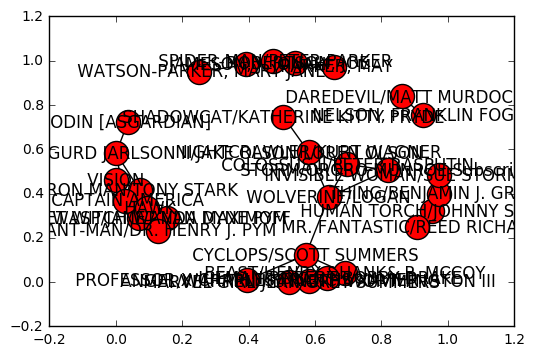

In [93]:
import matplotlib.pyplot as plt
nx.draw_networkx(G, pos=nx.spring_layout(G))
plt.show()